# Nasa Asteroids Classification

## Information on Asteroids collected from NASA API

![Asteroid Image](images/asteroids.jpg)

### Dependencies

```python
# Jupyter notebook
pip install notebook
# NumPy
pip install numpy
# SciPy
pip install scipy
# Pandas
pip install pandas
# Scikit-Learn
pip install scikit-learn
# Matplotlib
pip install matplotlib
# Seaborn
pip install seaborn
```

## Data Analysis and Preprocessing

### Import Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Create DataFrame from the Nasa CSV file

In [104]:
# DataFrame Pandas Settings
# pd.set_option('display.max_columns', None)

df = pd.read_csv("data/nasa.csv")

df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Pre-processing

#### Check if there are NA values

In [105]:
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

#### Check if there are duplicates

In [106]:
df.duplicated().sum()


0

#### Check if there is constant columns

In [107]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(constant_columns)

['Orbiting Body', 'Equinox']


### Drop Unnecessary Columns

There is no need for the ID and name of the asteroids.

In [108]:
new_df = df.drop(columns=['Neo Reference ID',
                          'Name',
                          'Est Dia in KM(min)',
                          'Est Dia in KM(max)',
                          'Est Dia in Miles(min)',
                          'Est Dia in Miles(max)',
                          'Est Dia in Feet(min)',
                          'Est Dia in Feet(max)',
                          'Relative Velocity km per hr',
                          'Miles per hour',
                          'Miss Dist.(Astronomical)',
                          'Miss Dist.(lunar)',
                          'Miss Dist.(miles)',
                          'Orbiting Body',
                          'Orbit ID',
                          'Equinox'
                          ])
new_df.to_csv('data/new_csv.csv', index=False)
new_df.head()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,127.219879,284.472297,1995-01-01,788947200000,6.115834,62753692.0,2017-04-06 08:36:37,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,146.067964,326.617897,1995-01-01,788947200000,18.113985,57298148.0,2017-04-06 08:32:49,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,231.502122,517.654482,1995-01-08,789552000000,7.590711,7622911.5,2017-04-06 09:20:19,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,8.801465,19.680675,1995-01-15,790156800000,11.173874,42683616.0,2017-04-06 09:15:49,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,127.219879,284.472297,1995-01-15,790156800000,9.840831,61010824.0,2017-04-06 08:57:58,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


### Encode Column types

As you can see below, there are 2 columns that have the type object, which makes it unable to be processed in data analysis, that are `Close Approach Date` and `Orbit Determination Date`. Additionally we have the column `Hazardous`, which has boolean type.

In [109]:
print(new_df.dtypes)

Absolute Magnitude              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Miss Dist.(kilometers)          float64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Eccentricity                    float64
Semi Major Axis                 float64
Inclination                     float64
Asc Node Longitude              float64
Orbital Period                  float64
Perihelion Distance             float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
Hazardous                          bool
dtype: object


We convert them to miliseconds given https://www.epochconverter.com/ calculations. Also we convert True -> 1 and False -> 0

In [110]:
new_df['Close Approach Date'] = pd.to_datetime(new_df['Close Approach Date'])
new_df['Close Approach Date'] = (new_df['Close Approach Date'].astype('int64'))

new_df['Orbit Determination Date'] = pd.to_datetime(new_df['Orbit Determination Date'])

new_df['Hazardous'] = new_df['Hazardous'].astype('int')


new_df.to_csv('data/new_csv.csv', index=False)
new_df.head()


,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,127.219879,284.472297,788918400000000000,788947200000,6.115834,62753692.0,2017-04-06 08:36:37,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,146.067964,326.617897,788918400000000000,788947200000,18.113985,57298148.0,2017-04-06 08:32:49,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,231.502122,517.654482,789523200000000000,789552000000,7.590711,7622911.5,2017-04-06 09:20:19,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,8.801465,19.680675,790128000000000000,790156800000,11.173874,42683616.0,2017-04-06 09:15:49,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,127.219879,284.472297,790128000000000000,790156800000,9.840831,61010824.0,2017-04-06 08:57:58,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


### Data Analysis

We can begin to analyze the data.

In [111]:
new_df.describe()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4.687000e+03,4687,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,204.604203,457.508906,1.179854e+18,1.179881e+12,13.970811,3.841347e+07,2017-04-16 09:54:40.266908672,3.516962,0.082320,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
min,11.160000,1.010543,2.259644,7.889184e+17,7.889472e+11,0.335504,2.660989e+04,2014-06-13 15:20:44,0.000000,0.000002,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,33.462237,74.823838,1.015546e+18,1.015574e+12,8.432865,1.995928e+07,2017-04-06 08:42:07.500000,0.000000,0.014585,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,110.803882,247.765013,1.203034e+18,1.203062e+12,12.917889,3.964771e+07,2017-04-06 09:03:02,3.000000,0.047365,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,253.837029,567.596853,1.355530e+18,1.355558e+12,18.077649,5.746863e+07,2017-04-06 09:22:13,6.000000,0.123593,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15579.552413,34836.938254,1.473293e+18,1.473318e+12,44.633747,7.478160e+07,2017-09-28 06:49:30,9.000000,0.477891,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000
std,2.890972,369.573402,826.391249,1.981540e+17,1.981540e+11,7.293223,2.181110e+07,NaN,3.078307,0.090300,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647


There are table that not being redundant or completly useless vary very little and do not influence the results that much like the table `Orbit determination Date` witch the most current date is from 2017 and the older date is from 2016 wich only varies one year given that the timelines we are working is decades for the comet to come this variation is meaningles.

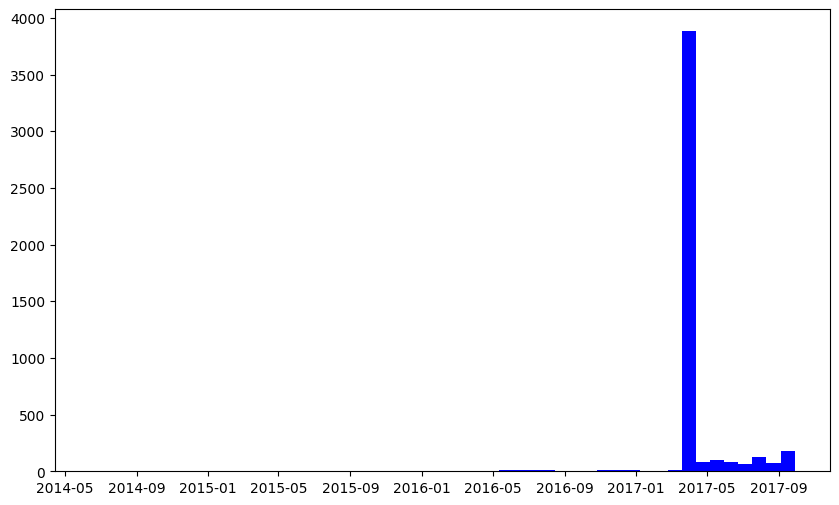

In [112]:

plt.figure(figsize=(10, 6))
plt.hist(new_df['Orbit Determination Date'], bins=50, color='blue')
print("")

Given that most of the data is from 2017 and the max variation is from 2014 we came to the comclusion that this table should probably be dropped

In [113]:
new_df.drop(columns=['Orbit Determination Date'], inplace=True)

0 Absolute Magnitude
1 Est Dia in M(min)


2 Est Dia in M(max)
3 Close Approach Date
4 Epoch Date Close Approach
5 Relative Velocity km per sec
6 Miss Dist.(kilometers)
7 Orbit Uncertainity
8 Minimum Orbit Intersection
9 Jupiter Tisserand Invariant
10 Epoch Osculation
11 Eccentricity
12 Semi Major Axis
13 Inclination
14 Asc Node Longitude
15 Orbital Period
16 Perihelion Distance
17 Perihelion Arg
18 Aphelion Dist
19 Perihelion Time
20 Mean Anomaly
21 Mean Motion


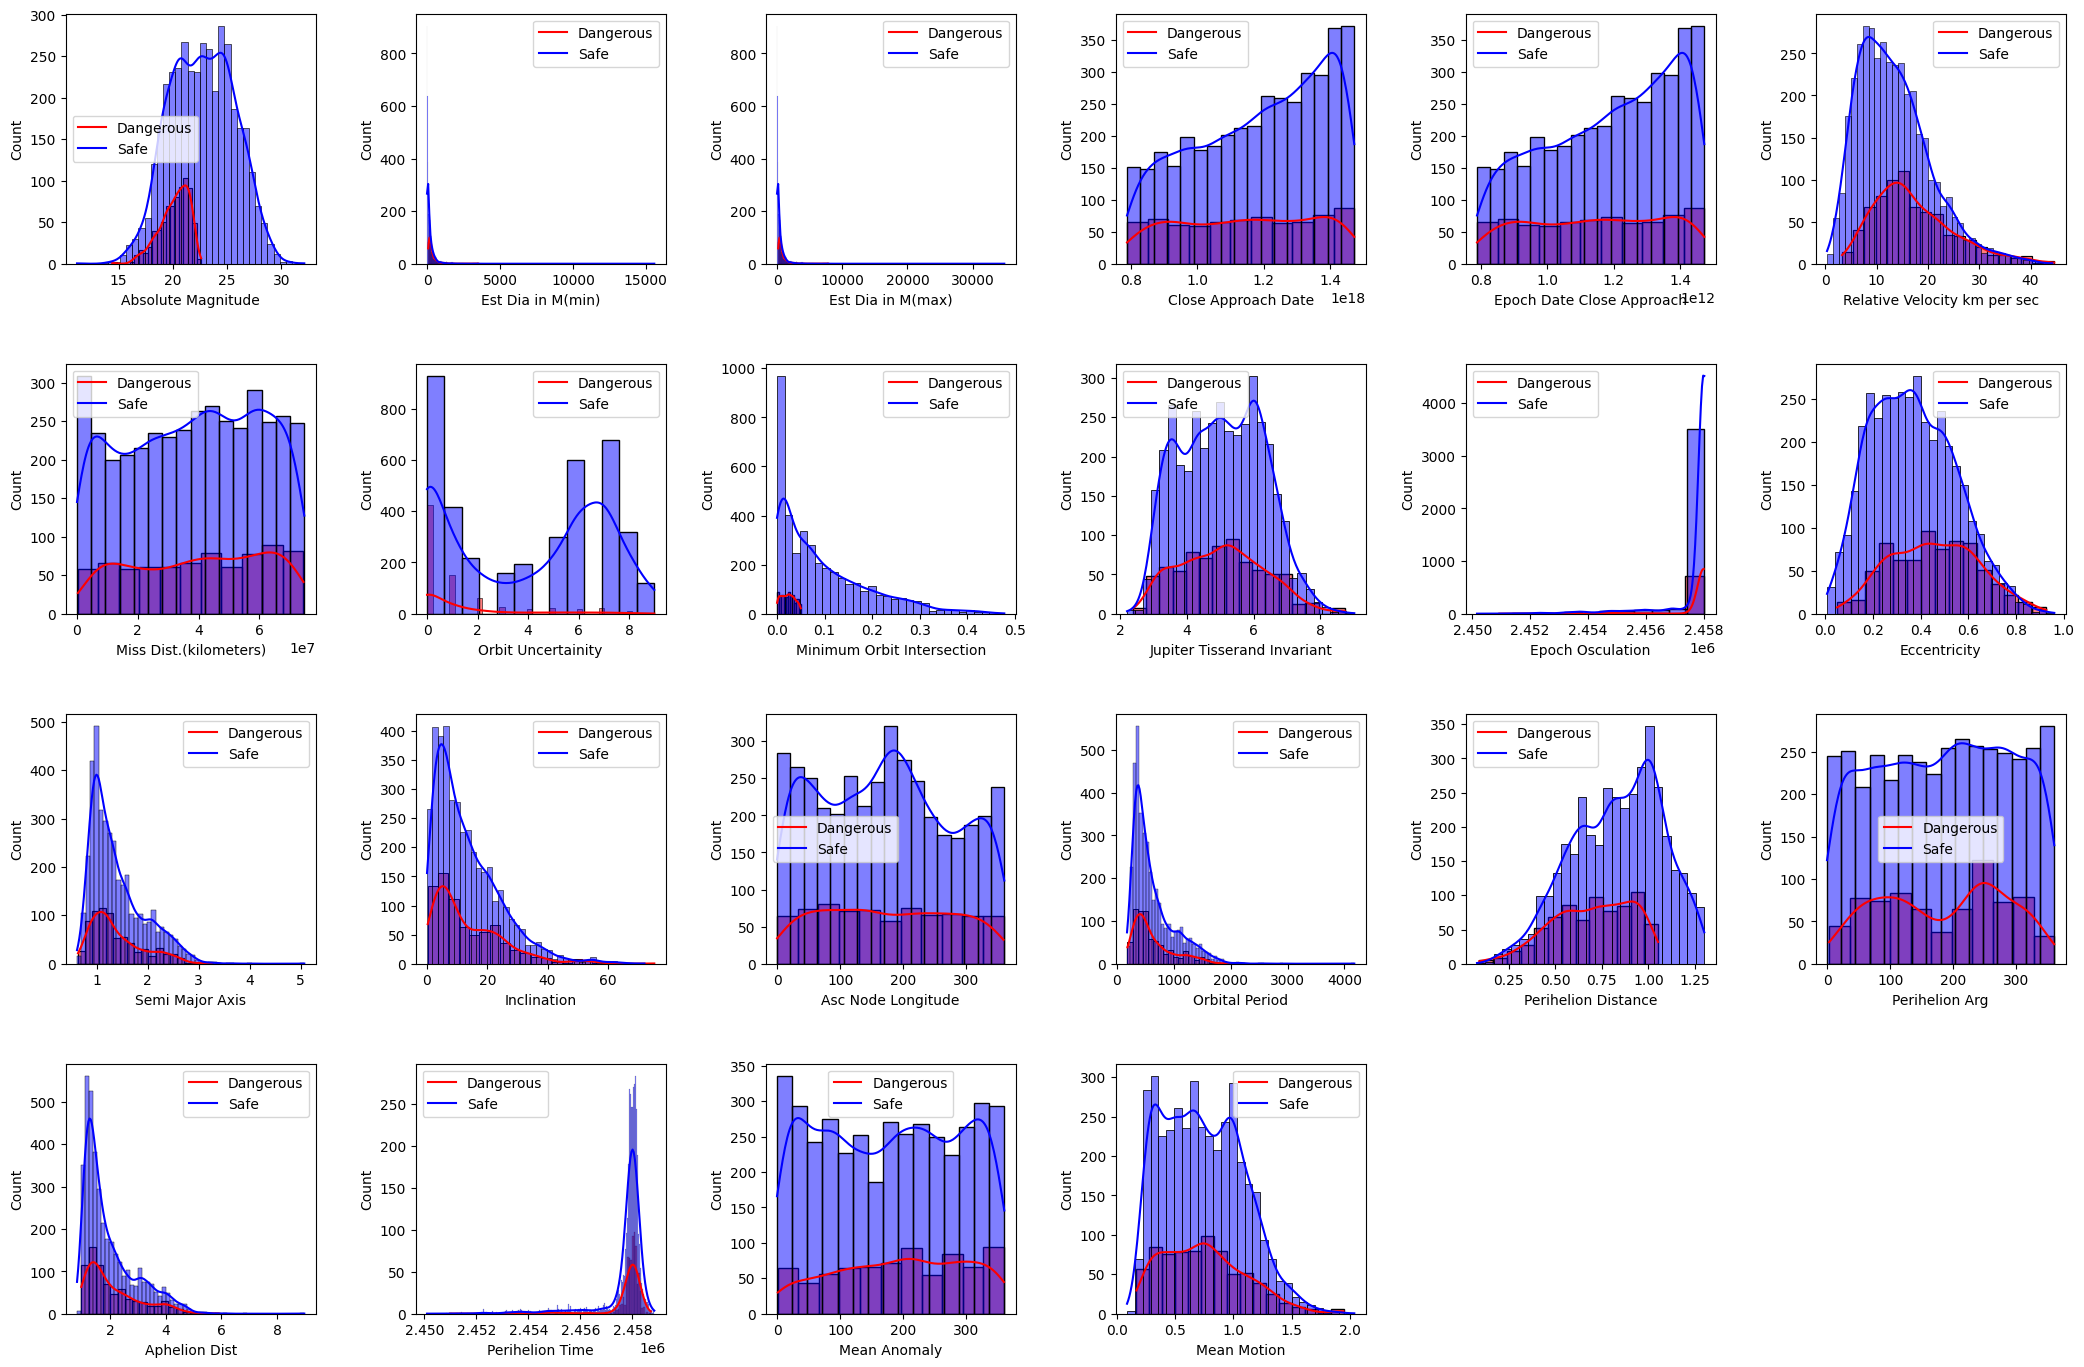

In [114]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

#sb.pairplot(df2.iloc[0:int(len(df)),7:8])
#sb.pairplot(df2.iloc[int(len(df)*18/1060):int(len(df)*19/1060),7:9])
#print(df2.iloc[0:int(len(df)),7:8])
df1 = new_df[new_df['Hazardous']==1].drop(['Hazardous'],axis=1)
df2 = new_df[new_df['Hazardous']==0].drop(['Hazardous'],axis=1)
cols = df2.columns
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(6,6,i+1)
    sb.histplot(data=df1[col], color='red', label = 'Dangerous', kde=True)
    sb.histplot(data=df2[col], color='blue', label = 'Safe', kde=True)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})
plt.show()


Train the model

In [115]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns=['Hazardous'])
y = new_df['Hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



use the classifier Kneighbors

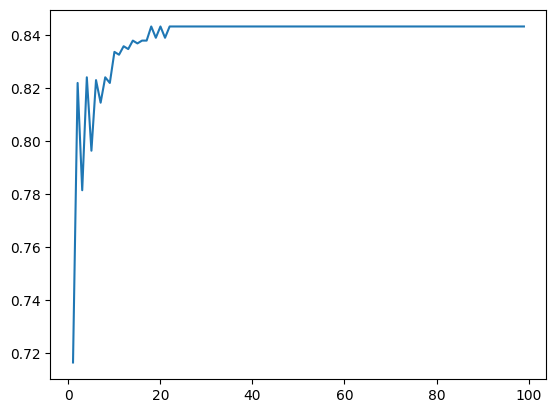

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
results = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    results.append(accuracy_score(y_test, y_pred))
plt.plot(range(1,100), results)
